In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df_train = pd.read_csv('ProcessedTrain_001.csv')
df_test = pd.read_csv('ProcessedTest_001.csv')
df_test=df_test.iloc[:,1:]
df_train=df_train.iloc[:,1:]

In [3]:
df_test

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,labels
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,0
1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,0
2,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,0
3,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,0
4,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,2
13092,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,2
13093,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,2
13094,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,2


In [4]:
df_test

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,labels
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,0
1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,0
2,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,0
3,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,0
4,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,2
13092,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,2
13093,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,2
13094,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,2


In [5]:
x_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]

In [6]:
x_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]

<h1>Training a Random Forest model </h1>

In [7]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

0.8972968845448992

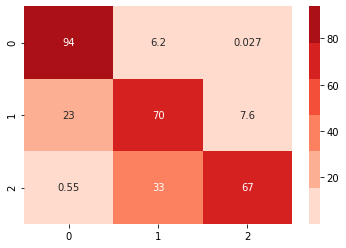

In [8]:
y_pred_RF = RF.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

In [9]:
res=RF.predict([[8,642.54,1580.89,1400.89,553.59,2388.05,47.21,522.09,2388.06,8.4213,393,39.05,23.3224]])
print(res)

[0]


In [10]:
res=RF.predict([[194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388,8.4715,394,38.65,23.1974]])
print(res)

[2]


<h1> Decision Tree </h1>

In [11]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()


In [12]:
model_DT.fit(x_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', model_DT.get_depth())

# predict the target on the train dataset
predict_test = model_DT.predict(x_test)
print('Target on train data',predict_test) 

Depth of the Decision Tree : 29
Target on train data [0 0 0 ... 1 2 2]


0.866905925473427

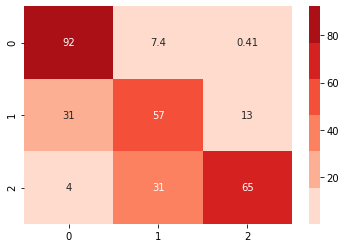

In [13]:
y_pred_DT = model_DT.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DT, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_DT)

In [14]:
res=model_DT.predict([[8,642.54,1580.89,1400.89,553.59,2388.05,47.21,522.09,2388.06,8.4213,393,39.05,23.3224]])
print(res)

[0]


<h1> Naive Bayes</h1>

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [16]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

0.82376298106292

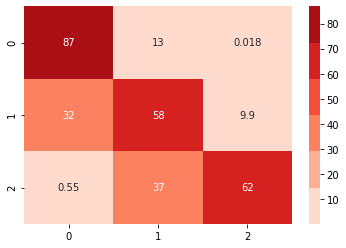

In [17]:
y_pred_NB = classifierNB.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_NB, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_NB)

In [18]:
res=classifierNB.predict([[8,642.54,1580.89,1400.89,553.59,2388.05,47.21,522.09,2388.06,8.4213,393,39.05,23.3224]])
print(res)

[2]


In [19]:
res=classifierNB.predict([[194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388,8.4715,394,38.65,23.1974]])
print(res)

[2]


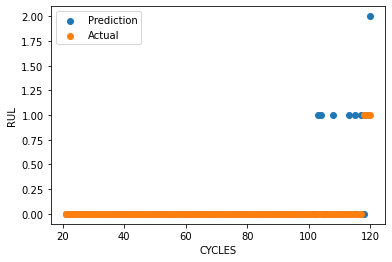

In [20]:
# Using the trained model to check the Test data
y_pred = model_DT.predict(x_test)


# Plotting the test data
plt.scatter(x_test['Cycle'][100:200],y_pred[100:200])
plt.scatter(x_test['Cycle'][100:200],np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc='upper left')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()